## Import Dataset dari Folder di Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/Startup/DicodingMLPemula/Submission_NLP/dataset_film/Train.csv')
#df_test=pd.read_csv('/content/gdrive/My Drive/Sanbercode/Week4/Project/test.csv')
#df_test=pd.read_csv('/content/gdrive/My Drive/Sanbercode/Week4/Project/test.csv')
#df_test=pd.read_csv('/content/gdrive/My Drive/Sanbercode/Week4/Project/test.csv')

## Standarisasi Nilai

In [ ]:
sns.set_context('paper')

SEED = 42
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 3000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100

## Mengambil 3.000 dari 40.000 Data Untuk di Uji

In [ ]:
df=df.head(3000)

## Langkah Tokenize Text

In [ ]:
token = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS)
token.fit_on_texts(df['text'])
x_encoded = token.texts_to_sequences(df['text'])
x = tf.keras.preprocessing.sequence.pad_sequences(x_encoded, maxlen=MAX_SEQUENCE_LENGTH)
y = df['label']
print("X: {}\nY: {}".format(len(x), len(y)))

X: 3000
Y: 3000


## Membagi Daat Latih dan Uji

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

## Menyusun Arsitektur dari Tensorflow

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(128, dropout=0.1, recurrent_dropout=0.1, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 468,769
Trainable params: 468,769
Non-trainable params: 0
________________________________________________

## Melakukan Training pada Data

In [ ]:
hist = model.fit(x, y, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
94/94 [==============================] - 132s 1s/step - loss: 0.6330 - accuracy: 0.6327 - val_loss: 0.4280 - val_accuracy: 0.8433
Epoch 2/10
94/94 [==============================] - 125s 1s/step - loss: 0.3959 - accuracy: 0.8270 - val_loss: 0.2558 - val_accuracy: 0.9317
Epoch 3/10
94/94 [==============================] - 126s 1s/step - loss: 0.2538 - accuracy: 0.9023 - val_loss: 0.1333 - val_accuracy: 0.9500
Epoch 4/10
94/94 [==============================] - 128s 1s/step - loss: 0.1795 - accuracy: 0.9283 - val_loss: 0.1269 - val_accuracy: 0.9450
Epoch 5/10
94/94 [==============================] - 126s 1s/step - loss: 0.1309 - accuracy: 0.9513 - val_loss: 0.0737 - val_accuracy: 0.9817
Epoch 6/10
94/94 [==============================] - 126s 1s/step - loss: 0.0799 - accuracy: 0.9750 - val_loss: 0.0427 - val_accuracy: 0.9883
Epoch 7/10
94/94 [==============================] - 126s 1s/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0109 - val_accuracy: 0.9983
Epoch 8/10
94

## Membuat Plot dari History

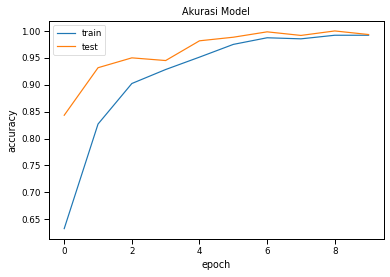

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

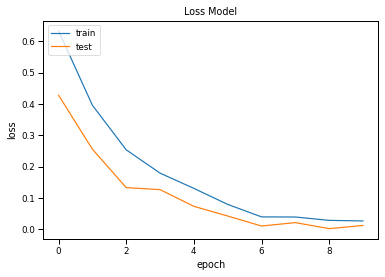

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()